In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#2.1
for i in range(1, 101):
    if i % 15 == 0:
        print("HelloThere")
    elif i % 5 == 0:
        print("There")
    elif i % 3 == 0:
        print("Hello")
    else:
        print(i)

1
2
Hello
4
There
Hello
7
8
Hello
There
11
Hello
13
14
HelloThere
16
17
Hello
19
There
Hello
22
23
Hello
There
26
Hello
28
29
HelloThere
31
32
Hello
34
There
Hello
37
38
Hello
There
41
Hello
43
44
HelloThere
46
47
Hello
49
There
Hello
52
53
Hello
There
56
Hello
58
59
HelloThere
61
62
Hello
64
There
Hello
67
68
Hello
There
71
Hello
73
74
HelloThere
76
77
Hello
79
There
Hello
82
83
Hello
There
86
Hello
88
89
HelloThere
91
92
Hello
94
There
Hello
97
98
Hello
There


In [3]:
#2.2

def sum_first_x_fibnumbers(x, treshold = 1000):
    fib = [0,1,1]
    counter = 0
    while counter != x:
        last_fib = fib[-1] + fib[-2]
        fib.append(last_fib)
        if fib[-1] > treshold:
            counter += 1
    return sum(fib[-x:])

sum_first_x_fibnumbers(10)

315227

In [4]:
#4
df = pd.read_excel(r"C:\Users\patri\Downloads\business_case_data_analyst.xlsx")
df.head()

,Category,# Users with Goals,Average Goal Price,Revenue promotion feature X
0,Tasteninstrumente,371711,356.70,84525
1,Wellness,316139,302.07,69900
2,Baugewerbe,353271,314.50,71960
3,Kühlschränke & Gefriergeräte,217701,173.57,40270
4,Reinigungsgeräte,157214,337.09,28685


In [5]:
#We can see how much each goal's pooled price is
df["Total Goal Price"] = df["# Users with Goals"] * df["Average Goal Price"]

In [6]:
df.describe()

,# Users with Goals,Average Goal Price,Revenue promotion feature X,Total Goal Price
count,3.600000e+02,360.000000,360.000000,3.600000e+02
mean,6.532002e+05,62.040861,26279.763889,3.385383e+07
std,1.190298e+06,58.182200,39182.810938,5.130353e+07
min,4.312000e+03,6.230000,115.000000,9.142080e+04
25%,1.168498e+05,23.000000,3372.500000,3.581074e+06
50%,2.665065e+05,40.875000,10370.000000,1.236172e+07
75%,6.947702e+05,79.292500,29067.500000,3.910380e+07
max,9.823760e+06,356.700000,251960.000000,2.960978e+08


In [7]:
#Here we can see the most popular and least popular Categories by Number of Users
display(df.sort_values("# Users with Goals", ascending = False).head())
display(df.sort_values("# Users with Goals", ascending = False).tail())

,Category,# Users with Goals,Average Goal Price,Revenue promotion feature X,Total Goal Price
256,Damenmode,9823760,24.69,213240,2.425486e+08
345,Filme & DVD,9433892,12.29,76395,1.159425e+08
354,Bücher & Comics,9001588,10.01,59745,9.010590e+07
337,DVDs Code-2 (Europa),6188827,11.91,54640,7.370893e+07
286,Briefmarken,6007557,20.49,103685,1.230948e+08


,Category,# Users with Goals,Average Goal Price,Revenue promotion feature X,Total Goal Price
226,HD DVD,8560,10.68,225,91420.80
293,Apple Macintosh,7076,33.37,115,236126.12
77,Paravent,5398,62.67,415,338292.66
224,Walkman,4491,26.14,120,117394.74
140,Stiche,4312,30.97,200,133542.64


In [8]:
#Here we can see the most expensive and least expensive Categories on average, fortunately we don't seem to have a
#small number of users for any of those values which would skew the result, so we don't need to filter any out.
display(df.sort_values("Average Goal Price", ascending = False).head())
display(df.sort_values("Average Goal Price", ascending = False).tail())

,Category,# Users with Goals,Average Goal Price,Revenue promotion feature X,Total Goal Price
0,Tasteninstrumente,371711,356.70,84525,1.325893e+08
4,Reinigungsgeräte,157214,337.09,28685,5.299527e+07
2,Baugewerbe,353271,314.50,71960,1.111037e+08
1,Wellness,316139,302.07,69900,9.549611e+07
10,Land- & Forstgewerbe,492922,254.67,75950,1.255324e+08


,Category,# Users with Goals,Average Goal Price,Revenue promotion feature X,Total Goal Price
356,Schlüsselanhänger & - bänder,224828,7.63,1395,1715437.64
328,Sonstige Bücher & Comics,393807,6.81,4130,2681825.67
357,Pins,647775,6.77,3795,4385436.75
359,Fremdsprachige Bücher,235841,6.26,1135,1476364.66
353,Zubehör,84817,6.23,580,528409.91


In [9]:
#The average goal cost is 51
ave_goal = df["Total Goal Price"].sum()/df["# Users with Goals"].sum()
ave_goal

51.82765362411471

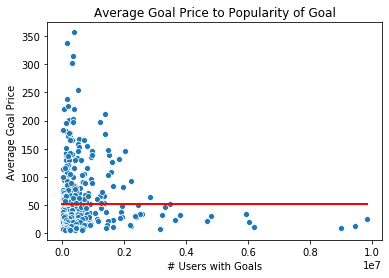

In [10]:
#We can see that most people gravitate towards cheaper goals, especially between the 0 to 100 mark.
#We also notice that the most popular goals for people are the cheapest.
g = sns.scatterplot(x="# Users with Goals", y="Average Goal Price", data = df)
g.set_title("Average Goal Price to Popularity of Goal")
plt.plot([0, df["# Users with Goals"].max()], [ave_goal, ave_goal], linewidth=2, color = "red") #Average line
plt.show()

In [11]:
df["Number of Users using Feature X per Category"] = df["Revenue promotion feature X"]/5
df["Perc of Users using Feature X per Category"] = df["Number of Users using Feature X per Category"]/df["# Users with Goals"]

In [12]:
#Check which Categories lead us to get the most and least revenue from Feature X
display(df.sort_values("Revenue promotion feature X", ascending = False).head())
display(df.sort_values("Revenue promotion feature X", ascending = False).tail())

,Category,# Users with Goals,Average Goal Price,Revenue promotion feature X,Total Goal Price,Number of Users using Feature X per Category,Perc of Users using Feature X per Category
25,Radsport,2032522,145.68,251960,2.960978e+08,50392.0,0.024793
256,Damenmode,9823760,24.69,213240,2.425486e+08,42648.0,0.004341
23,Antikes Mobiliar & Einrichtung,1503050,139.50,189310,2.096755e+08,37862.0,0.025190
19,Handys ohne SIM-Lock,1363753,175.81,186940,2.397614e+08,37388.0,0.027416
20,Gartenmöbel,1366474,212.04,181565,2.897471e+08,36313.0,0.026574


,Category,# Users with Goals,Average Goal Price,Revenue promotion feature X,Total Goal Price,Number of Users using Feature X per Category,Perc of Users using Feature X per Category
247,Discman,10395,14.97,240,155613.15,48.0,0.004618
226,HD DVD,8560,10.68,225,91420.80,45.0,0.005257
140,Stiche,4312,30.97,200,133542.64,40.0,0.009276
224,Walkman,4491,26.14,120,117394.74,24.0,0.005344
293,Apple Macintosh,7076,33.37,115,236126.12,23.0,0.003250


In [13]:
#Check which Categories have a bigger percentage of Feature X users
display(df.sort_values("Perc of Users using Feature X per Category", ascending = False).head())
display(df.sort_values("Perc of Users using Feature X per Category", ascending = False).tail())

,Category,# Users with Goals,Average Goal Price,Revenue promotion feature X,Total Goal Price,Number of Users using Feature X per Category,Perc of Users using Feature X per Category
0,Tasteninstrumente,371711,356.70,84525,1.325893e+08,16905.0,0.045479
1,Wellness,316139,302.07,69900,9.549611e+07,13980.0,0.044221
2,Baugewerbe,353271,314.50,71960,1.111037e+08,14392.0,0.040739
3,Kühlschränke & Gefriergeräte,217701,173.57,40270,3.778636e+07,8054.0,0.036996
4,Reinigungsgeräte,157214,337.09,28685,5.299527e+07,5737.0,0.036492


,Category,# Users with Goals,Average Goal Price,Revenue promotion feature X,Total Goal Price,Number of Users using Feature X per Category,Perc of Users using Feature X per Category
355,Kaffeerahmdeckel,431674,10.36,2680,4472142.64,536.0,0.001242
356,Schlüsselanhänger & - bänder,224828,7.63,1395,1715437.64,279.0,0.001241
357,Pins,647775,6.77,3795,4385436.75,759.0,0.001172
358,CDs,3148121,8.67,16650,27294209.07,3330.0,0.001058
359,Fremdsprachige Bücher,235841,6.26,1135,1476364.66,227.0,0.000963


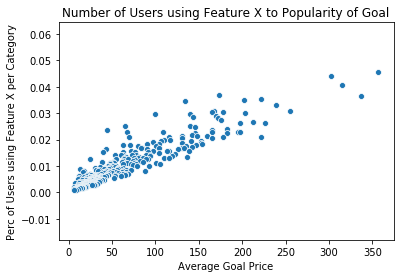

In [14]:
#We can see a clear trend here. More people use the feature if the item is more expensive. Which makes sense.
g = sns.scatterplot(x="Average Goal Price", y="Perc of Users using Feature X per Category", data = df)
g.set_title("Number of Users using Feature X to Popularity of Goal")
plt.show()

In [15]:
print(r"""
Not many people are using feature X. It's going from a 4.5% to 0.09% subscription rate.
With the current data it is impossible to show the benefits of feature X. If we had a breakdown on average speed of goal
completion for both groups we could show if the 5$ are worth the investment and advertise that. Eventually, we could look
into making an algorithm which uses the user's data to predict how long a goal would take to be reached with and
without Feature X.

Also it would make sense that 5$ is a lot to ask for because the average goal is 51$. Its likely the user will not
see the value in spending 10% of the goal they're trying to achieve. Maybe Feature X needs to be more universal, the way the
data is structured makes me believe that Feature X is specific to the goal and the user. That is to say, the benefits
from Feature X don't translate over for one goal to another. If that is the case we should maybe look into 
making Feature X be more universal.


We also don't know how long the benefits of Feature X last, not all goals take the same amount of time to be reached.
It would be more enticing for users to spend 5$ on more expensive goals as they probably last longer. 
""")


Not many people are using feature X. It's going from a 4.5% to 0.09% subscription rate.
With the current data it is impossible to show the benefits of feature X. If we had a breakdown on average speed of goal
completion for both groups we could show if the 5$ are worth the investment and advertise that. Eventually, we could look
into making an algorithm which uses the user's data to predict how long a goal would take to be reached with and
without Feature X.

Also it would make sense that 5$ is a lot to ask for because the average goal is 51$. Its likely the user will not
see the value in spending 10% of the goal they're trying to achieve. Maybe Feature X needs to be more universal, the way the
data is structured makes me believe that Feature X is specific to the goal and the user. That is to say, the benefits
from Feature X don't translate over for one goal to another. If that is the case we should maybe look into 
making Feature X be more universal.


We also don't know how long the